The first step is to input the Hoboken restaurants review data from the previous data 
gathering done by the web scraper.  I printed the head of the dataframe (df) to see the first 5 rows.

In [82]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/rickroma/Desktop/Hoboken_restaurants_reviews.csv", index_col=0)
print(df.head())

   Unnamed: 0.1                 user_id   user_name      user_rating  \
0             0  dRuCO4NYO7zyAF8-CeJmZg    Jason L.  5.0 star rating   
1             1  f36YZ1cA291bNtMHXWtu1Q  Danyale W.  4.0 star rating   
2             2  -xYUKfWQTaB-7BeizsQA3w    Robin G.  5.0 star rating   
3             3  tt1vLgAP5UpRXAKJLT2KWg     Alec K.  4.0 star rating   
4             4  -K79Xep4lElqIChsJYWuiQ   Robbie O.  5.0 star rating   

                                           user_text restaurant_name  \
0  We booked Grand Vin as our brunch location to ...       Grand Vin   
1  Sooooo for date night it was his turn to pick ...       Grand Vin   
2  Adorable little wine bar with outdoor seating ...       Grand Vin   
3  One of the top restaurants in Hoboken. Well ma...       Grand Vin   
4  Great space- service is on point -  short rib ...       Grand Vin   

  restaurant_rating restaurant_price                        restaurant_type  
0   4.0 star rating               $$  Wine, Bars,, Itali

The info method provides a quick description of the data such as number of rows, columns, and the heading of each column.  

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74611 entries, 0 to 74610
Data columns (total 9 columns):
Unnamed: 0.1         74611 non-null int64
user_id              74611 non-null object
user_name            74611 non-null object
user_rating          74611 non-null object
user_text            74611 non-null object
restaurant_name      74611 non-null object
restaurant_rating    74611 non-null object
restaurant_price     74479 non-null object
restaurant_type      74611 non-null object
dtypes: int64(1), object(8)
memory usage: 5.7+ MB


Since there were 132 missing rows for restaurant_price, I decided to remove those rows since 
they represented such a small number of the 74,000 plus rows.

In [85]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74479 entries, 0 to 74610
Data columns (total 9 columns):
Unnamed: 0.1         74479 non-null int64
user_id              74479 non-null object
user_name            74479 non-null object
user_rating          74479 non-null object
user_text            74479 non-null object
restaurant_name      74479 non-null object
restaurant_rating    74479 non-null object
restaurant_price     74479 non-null object
restaurant_type      74479 non-null object
dtypes: int64(1), object(8)
memory usage: 5.7+ MB


Since the Unnamed: 0.1 column is an index column, I wanted to relabel the column.

In [86]:
df.rename(columns={'Unnamed: 0.1':'Index'}, inplace=True)
print(df.head())

   Index                 user_id   user_name      user_rating  \
0      0  dRuCO4NYO7zyAF8-CeJmZg    Jason L.  5.0 star rating   
1      1  f36YZ1cA291bNtMHXWtu1Q  Danyale W.  4.0 star rating   
2      2  -xYUKfWQTaB-7BeizsQA3w    Robin G.  5.0 star rating   
3      3  tt1vLgAP5UpRXAKJLT2KWg     Alec K.  4.0 star rating   
4      4  -K79Xep4lElqIChsJYWuiQ   Robbie O.  5.0 star rating   

                                           user_text restaurant_name  \
0  We booked Grand Vin as our brunch location to ...       Grand Vin   
1  Sooooo for date night it was his turn to pick ...       Grand Vin   
2  Adorable little wine bar with outdoor seating ...       Grand Vin   
3  One of the top restaurants in Hoboken. Well ma...       Grand Vin   
4  Great space- service is on point -  short rib ...       Grand Vin   

  restaurant_rating restaurant_price                        restaurant_type  
0   4.0 star rating               $$  Wine, Bars,, Italian,, Cocktail, Bars  
1   4.0 star rating 

Since the variables user_rating and restaurant_rating are currently objects, I wanted to 
change them to numeric numbers so we could further explore their attributes.

In [87]:
df['restaurant_rating'] = df['restaurant_rating'].str[:3]
df['restaurant_rating'] = pd.to_numeric(df['restaurant_rating'], errors='coerce')
df['restaurant_rating'].head()


0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: restaurant_rating, dtype: float64

In [88]:
df['user_rating'] = df['user_rating'].str[:3]
df['user_rating'] = pd.to_numeric(df['user_rating'], errors='coerce')
df['user_rating'].head()

0    5.0
1    4.0
2    5.0
3    4.0
4    5.0
Name: user_rating, dtype: float64

Now I can use the describe() method to show a summary of the numerical attributes, with 
restaurant_rating and user_rating included

In [89]:
df.describe()


,Index,user_rating,restaurant_rating
count,74479.000000,74479.000000,74479.000000
mean,383.389855,3.791297,3.786410
std,477.556596,1.267112,0.431212
min,0.000000,1.000000,1.500000
25%,77.000000,3.000000,3.500000
50%,193.000000,4.000000,4.000000
75%,491.000000,5.000000,4.000000
max,2739.000000,5.000000,5.000000


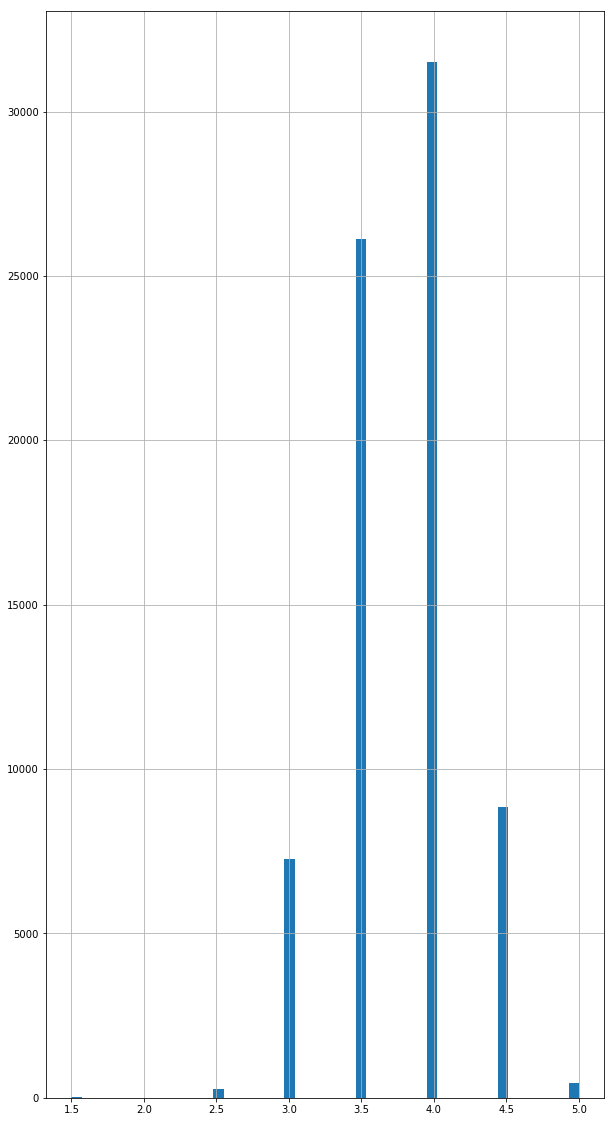

In [90]:
import matplotlib.pyplot as plt
df['restaurant_rating'].hist(bins=50, figsize=(10,20))
plt.show()

The histogram above visually shows the restaurant_ratings in Hoboken.  A rating of '4' has themost ratings by far followed by 3.5.  Interestingly to me is the low number of '5' ratings an
also that no one has given a '1' rating to a Hoboken restaurant. 

In [91]:
corr_matrix = df.corr()
corr_matrix['user_rating'].sort_values(ascending=False)

user_rating          1.000000
restaurant_rating    0.322489
Index                0.028571
Name: user_rating, dtype: float64

Given the limited number of numerical variables, there was not much to be learned from the 
correlation matrix or from creating a multitude of plots.

Now I will begin training and evaluating on the training set.

In [92]:
df['Positive'] = np.where(df['restaurant_rating'] > 3, 1, 0)
print(df.head())

   Index                 user_id   user_name  user_rating  \
0      0  dRuCO4NYO7zyAF8-CeJmZg    Jason L.          5.0   
1      1  f36YZ1cA291bNtMHXWtu1Q  Danyale W.          4.0   
2      2  -xYUKfWQTaB-7BeizsQA3w    Robin G.          5.0   
3      3  tt1vLgAP5UpRXAKJLT2KWg     Alec K.          4.0   
4      4  -K79Xep4lElqIChsJYWuiQ   Robbie O.          5.0   

                                           user_text restaurant_name  \
0  We booked Grand Vin as our brunch location to ...       Grand Vin   
1  Sooooo for date night it was his turn to pick ...       Grand Vin   
2  Adorable little wine bar with outdoor seating ...       Grand Vin   
3  One of the top restaurants in Hoboken. Well ma...       Grand Vin   
4  Great space- service is on point -  short rib ...       Grand Vin   

   restaurant_rating restaurant_price                        restaurant_type  \
0                4.0               $$  Wine, Bars,, Italian,, Cocktail, Bars   
1                4.0               $$  W

In [93]:
from sklearn.model_selection import train_test_split

X = df['user_text']

X_train, X_test, y_train, y_test = train_test_split(df['user_text'], df['Positive'], random_state = 0)
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)


X_train first entry: 

 We booked Grand Vin as our brunch location to celebrate our wedding day. And we could not be happier!We had a group of 45 guests, and were able to reserve the back dining room. Everything about this restaurant is 5 stars. The decor was immaculate. Our food choices were loved by all (french onion burger and avocado toast eggs benedict were the biggest hits). Everything ran smoothly and without a hitch.However, the star of the day was our Event Director, Anne Marie. From the very beginning conversations, to the last minute changes, Anne Marie blew us away. She was meticulous, down to the most minute details. We wouldn't have nearly had as great of a time if it wasn't for her.We will definitely be bringing our business back to Grand Vin!


X_train shape:  (55859,)


In [94]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [95]:
vect.get_feature_names()[::1000]

['00',
 '50ish',
 'adorably',
 'angling',
 'attained',
 'bavarian',
 'blergh',
 'brocc',
 'cannellini',
 'checknon',
 'clothing',
 'continue',
 'crustinis',
 'deliciousssssssss',
 'disorderly',
 'durian',
 'eo',
 'fam',
 'flipflops',
 'fry',
 'gnawed',
 'guiness',
 'hiawatha',
 'ice',
 'internet',
 'kababs',
 'lavazza',
 'loscharritos',
 'maryi',
 'minerality',
 'murmurs',
 'nopal',
 'optimistic',
 'pappardelle',
 'phonetically',
 'portuguese',
 'pulav',
 'recommendmy',
 'reviewnot',
 'salamis',
 'seed',
 'side',
 'soho',
 'staffers',
 'sucker',
 'tartar',
 'tiffany',
 'truffe',
 'unpublished',
 'vom',
 'wildly',
 'yummylamb']

In [96]:
len(vect.get_feature_names())

51237

In [97]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<55859x51237 sparse matrix of type '<class 'numpy.int64'>'
	with 4139507 stored elements in Compressed Sparse Row format>

In [98]:
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.717972699401


In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, vect.transform(X), df['Positive'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [102]:
def display_scores(scores):
    print("Accuracy: %0.3f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

In [103]:
display_scores(tree_rmse_scores)

Accuracy: 0.342 (+/- 0.0971)


In [104]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:50]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-51:-1]]))

Smallest Coefs: 
['cluck' 'ainsworth' 'trees' 'bagatelle' 'serafina' 'houlihan' 'birch'
 'pourhouse' 'noches' 'houlihans' 'atrium' 'catch' 'wolf' 'colombian'
 'tower' 'malibu' 'teri' 'mrc' 'hbg' 'cheesecake' 'models' 'cheesecakes'
 'birds' 'park' 'diner' '10th' 'hellfire' 'willow' 'nomenon' 'heaters'
 'erica' 'popeyes' 'hundred' 'clubbing' 'garden' '8th' 'mores' 'coalhouse'
 'filter' 'kali' 'greenhouse' 'cantonese' 'urbano' 'wicked' 'compensation'
 'hamachi' 'tilapia' 'bonfire' 'minestrone' 'vegans']

Largest Coefs: 
['baja' 'morimoto' 'sugar' 'shoestring' 'bear' 'chart' 'goblet' 'turtle'
 'hamilton' 'shredded' 'fig' 'paella' 'deviled' 'madison' 'speakeasy'
 'biergarten' 'pig' 'hibachi' 'sake' 'inn' 'liver' 'indian' 'shuffleboard'
 'tenjune' 'lava' 'byob' 'goblets' 'byo' 'barbuto' 'olive' 'intimate'
 'clam' 'korean' 'personable' 'lobsters' 'perry' '36' 'marrow' 'trout'
 'duck' 'pastries' 'crepes' 'valet' 'omakase' 'promo' 'pita' 'robongi'
 'medicore' 'german' 'ues']



Tf-Idf

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

16123

In [106]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.615289178942


In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, vect.transform(X), df['Positive'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


Accuracy: 0.312 (+/- 0.0548)


In [108]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:50]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-51:-1]]))

Smallest Tfidf: 
['quartet' 'capabilities' 'kimo' 'francescana' 'apician' 'lovage'
 'awarding' 'kenscale' 'namul' 'nuttiness' 'protocol' 'transform'
 'submerged' 'decadently' 'incredulous' 'recap' 'patches' 'assistants'
 'missouri' 'relented' 'violated' 'surpassing' 'political' 'misled'
 'signaled' 'complied' 'merited' 'mostarda' 'unrecognizable' 'elementary'
 'losses' 'joys' 'segments' 'bark' 'flutes' 'concord' 'snapdragon'
 'overjoyed' 'demonstrates' 'eustachio' 'sant' 'eponymous' 'verbal' 'suji'
 'amouse' 'progression' '94' 'illustrated' 'unmistakable' 'morphed']

Largest Tfidf: 
['dance' 'le' 'horrid' 'bikes' 'pizza' 'wiki' 'a1' 'nom' 'yum' 'looooong'
 'word' 'dope' 'fugu' 'slider' 'lousy' 'cous' 'duck' 'pio' 'meh' 'ribs'
 'ube' 'lovely' 'star' 'yup' 'pho' '99' 'mayonnaise' 'saki' 'wurst' 'mates'
 'beautiful' 'tick' 'coctails' 'nasty' 'taste' 'cheesesteak' 'average'
 'scott' 'fan' 'steph' 'nay' 'waffles' 'lobster' 'vito' 'wow' 'moran'
 'specially' 'icecream' 'chops' 'hookah']



Test the Prediction

In [109]:
print(model.predict(vect.transform(["""Went out to the food trucks on a warm day with a coworker. The day before, we were told by another coworker how Left Bank had, in her opinion, the best burgers in Jersey City. Needless to say, she wasn't far off.The truck had a sizable line in front of it, but the guy on the truck was quick to take orders. My coworker ordered the Bankrupt Burger (their classic cheeseburger), whereas I had the Garden State (black bean veggie burger). Both came with fries and cost $11 ($12 including a bottled water). Not a bad deal. My coworker LOVED her Bankrupt Burger, specifically for its Bank Sauce (an elevated version of Mac Sauce) and thought the fries were perfectly seasoned and didn't require your standard blast of Heinz. As for me, I'm not normally a veggie burger girl, but this burger was rich, flavorful and packed with yummy condiments. I almost forgot that I was having a veggie burger. Almost. As for the fries, my coworker was spot-on; good seasoning and no ketchup required.  Will definitely be coming back to LB's truck,and will need to hit up the restaurant location soon!""","""I've been going here for almost two years before they renovated and changed their name.  When we arrived this evening I thought I knew what to expect- decent burgers with the usual 15-minute wait.  This evening my boyfriend and I came back-  I ordered the new Filipino-themed burger in lettuce (I'm Filipina so this was cool) he ordered the vintage burger with fries, etc.  It seemed like a simple order.  Tonight they were under-staffed and too inexperienced to handle the sudden influx of customers that came in for dinner, on the first heat wave of spring, on a Friday.  Given the circumstances I'd be very understanding, but it took an 1 hour and ten minutes to get our order!  It would have been helpful if we were told it was going to take much longer than usual.  We would have gone elsewhere, or prepared ourselves with snacks and beer.  Not knowing when our food was arriving annoyed me the most.  After asking twice about our food it finally came.  The Filipino-ness of the burger was as if your Filipino mom placed some leftover longanisa on your burger and squirted banana ketchup.  I think I'll go to Journal Square and get these ingredients to add to the burgers I'll cook for my boyfriend and I next time. My best suggestion is to properly manage your staff and your customers expectations! I understand you're still working out the kinks, but having your customers wait over an hour without managing expectations is unacceptable.  You're in a culture that expects prompt service (its NY/NJ after all).  There's a lot of competition, so best to step it up!"""])))

[1 1]


N-Grams

In [110]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

144610

In [111]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:50]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-51:-1]))

Smallest Coef: 
['af' 'are food' '930pm' 'bass special' 'after receiving' 'also see'
 'again yes' '20 will' 'and busier' 'are simple' 'and vegetables'
 'again wish' 'atmosphere and' 'and hoped' 'and time' 'and traditional'
 'because just' 'and unacceptable' 'because' '02' 'around 11pm'
 'and vegetable' 'an unfortunate' 'avocado soup' 'absolute favorite'
 'bar night' 'beautifully prepared' 'alone because' 'basically ignored'
 'and hopefully' 'bathroom there' 'and yell' 'absolute gem' 'apologies and'
 'and hoisin' 'because could' 'are hands' 'alone is' 'all work'
 'and weekend' 'all perfectly' 'be honest' 'additionally there' 'astoria'
 'and hoboken' 'and affordable' 'ayana' 'any style' 'accommodating staff'
 'are close']

Largest Coef: 
['addition it' 'bad option' 'any indication' 'at friend' 'always treat'
 'because based' 'almond cake' 'and waited' 'available too' 'are talking'
 'and mains' 'bathrooms and' 'also can' 'all remember' 'and engage'
 'an elevator' 'appetizers not' '4th sto

In [112]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.727761729615


In [ ]:
print(model.predict(vect.transform(["""Went out to the food trucks on a warm day with a coworker. The day before, we were told by another coworker how Left Bank had, in her opinion, the best burgers in Jersey City. Needless to say, she wasn't far off.The truck had a sizable line in front of it, but the guy on the truck was quick to take orders. My coworker ordered the Bankrupt Burger (their classic cheeseburger), whereas I had the Garden State (black bean veggie burger). Both came with fries and cost $11 ($12 including a bottled water). Not a bad deal. My coworker LOVED her Bankrupt Burger, specifically for its Bank Sauce (an elevated version of Mac Sauce) and thought the fries were perfectly seasoned and didn't require your standard blast of Heinz. As for me, I'm not normally a veggie burger girl, but this burger was rich, flavorful and packed with yummy condiments. I almost forgot that I was having a veggie burger. Almost. As for the fries, my coworker was spot-on; good seasoning and no ketchup required.  Will definitely be coming back to LB's truck,and will need to hit up the restaurant location soon!""","""I've been going here for almost two years before they renovated and changed their name.  When we arrived this evening I thought I knew what to expect- decent burgers with the usual 15-minute wait.  This evening my boyfriend and I came back-  I ordered the new Filipino-themed burger in lettuce (I'm Filipina so this was cool) he ordered the vintage burger with fries, etc.  It seemed like a simple order.  Tonight they were under-staffed and too inexperienced to handle the sudden influx of customers that came in for dinner, on the first heat wave of spring, on a Friday.  Given the circumstances I'd be very understanding, but it took an 1 hour and ten minutes to get our order!  It would have been helpful if we were told it was going to take much longer than usual.  We would have gone elsewhere, or prepared ourselves with snacks and beer.  Not knowing when our food was arriving annoyed me the most.  After asking twice about our food it finally came.  The Filipino-ness of the burger was as if your Filipino mom placed some leftover longanisa on your burger and squirted banana ketchup.  I think I'll go to Journal Square and get these ingredients to add to the burgers I'll cook for my boyfriend and I next time. My best suggestion is to properly manage your staff and your customers expectations! I understand you're still working out the kinks, but having your customers wait over an hour without managing expectations is unacceptable.  You're in a culture that expects prompt service (its NY/NJ after all).  There's a lot of competition, so best to step it up!"""])))

[1 1]
